In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\2021\Desktop\project\data\data_preprocessing.csv") 

C:\Users\2021\AppData\Local\Temp\ipykernel_4412\1423206278.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\2021\Desktop\project\data\data_preprocessing.csv")


In [3]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)

In [4]:
df.head()

,link,label,entropy,url_length,hostname_length,path_length,fd_length,tld,tld_length,count-,count@,count?,count%,count.,count=,count#,count+,count$,count!,count*,"count,",count//,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url,sus_url
0,https://www.google.com,benign,-3.663533,22,14,0,0,com,3,0,0,0,0,2,0,0,0,0,0,0,0,1,1,1,1,0,17,0,1,1,0
1,https://www.youtube.com,benign,-3.762267,23,15,0,0,com,3,0,0,0,0,2,0,0,0,0,0,0,0,1,1,1,1,0,18,0,1,1,0
2,https://www.facebook.com,benign,-3.855389,24,16,0,0,com,3,0,0,0,0,2,0,0,0,0,0,0,0,1,1,1,1,0,19,0,1,1,0
3,https://www.baidu.com,benign,-3.880180,21,13,0,0,com,3,0,0,0,0,2,0,0,0,0,0,0,0,1,1,1,1,0,16,0,1,1,0
4,https://www.wikipedia.org,benign,-3.813661,25,17,0,0,org,3,0,0,0,0,2,0,0,0,0,0,0,0,1,1,1,1,0,20,0,1,1,0


In [5]:
df.shape

(694462, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694462 entries, 0 to 694461
Data columns (total 31 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   link             694462 non-null  object 
 1   label            694462 non-null  object 
 2   entropy          694462 non-null  float64
 3   url_length       694462 non-null  int64  
 4   hostname_length  694462 non-null  int64  
 5   path_length      694462 non-null  int64  
 6   fd_length        694462 non-null  int64  
 7   tld              625831 non-null  object 
 8   tld_length       694462 non-null  int64  
 9   count-           694462 non-null  int64  
 10  count@           694462 non-null  int64  
 11  count?           694462 non-null  int64  
 12  count%           694462 non-null  int64  
 13  count.           694462 non-null  int64  
 14  count=           694462 non-null  int64  
 15  count#           694462 non-null  int64  
 16  count+           694462 non-null  int6

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

link                   0
label                  0
entropy                0
url_length             0
hostname_length        0
path_length            0
fd_length              0
tld                68631
tld_length             0
count-                 0
count@                 0
count?                 0
count%                 0
count.                 0
count=                 0
count#                 0
count+                 0
count$                 0
count!                 0
count*                 0
count,                 0
count//                0
count-http             0
count-https            0
count-www              0
count-digits           0
count-letters          0
count_dir              0
use_of_ip              0
short_url              0
sus_url                0
dtype: int64

# Data Visualization

<AxesSubplot:>

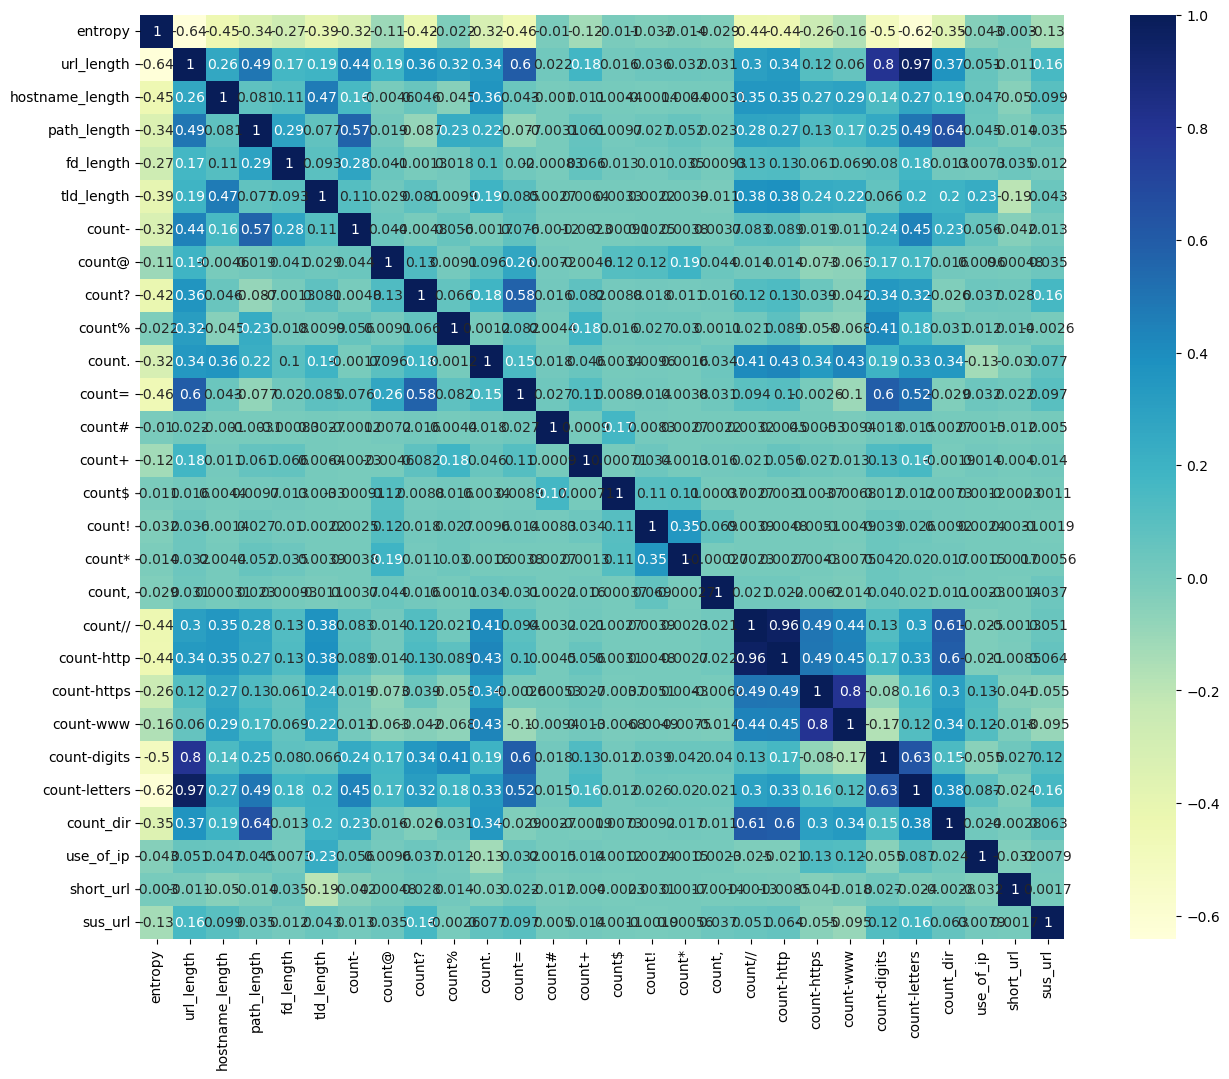

In [9]:
# Apply correlation plot to see the correlation between numerical variables.

plt.figure(figsize=(17,12))
# plt.figure(figsize=(14, 14))
dat_cor = df.corr()
sns.heatmap(dat_cor, cmap = 'YlGnBu', annot=True, square=True)

Text(0, 0.5, 'Number Of URLs')

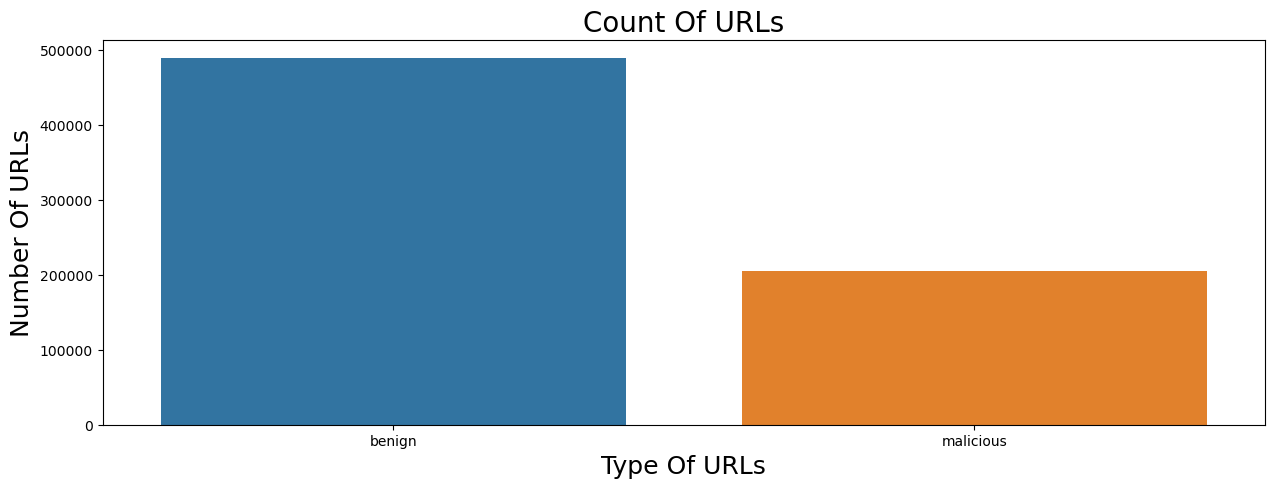

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(x='label',data=df)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

In [11]:
print("Percent Of Malicious URLs:{:.2f} %".format(len(df[df['label']=='malicious'])/len(df['label'])*100))
print("Percent Of Benign URLs:{:.2f} %".format(len(df[df['label']=='benign'])/len(df['label'])*100))

Percent Of Malicious URLs:29.55 %
Percent Of Benign URLs:70.45 %


# Building Models

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , confusion_matrix , classification_report
from sklearn.ensemble import  RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler , PowerTransformer , MinMaxScaler , StandardScaler , LabelEncoder , Normalizer , MaxAbsScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.feature_selection import SelectKBest , chi2
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,VotingClassifier,\
GradientBoostingClassifier,StackingClassifier,VotingClassifier,HistGradientBoostingClassifier,GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier

import pickle

#with open('rf_model_pkl','wb') as file:
   # pickle.dump(rf,file)
    
""" 
    Decision trees and ensemble methods do not require feature scaling 
    to be performed as they are not sensitive to the variance in the data.
   
"""
import pickle    

In [13]:
df.head()

,link,label,entropy,url_length,hostname_length,path_length,fd_length,tld,tld_length,count-,count@,count?,count%,count.,count=,count#,count+,count$,count!,count*,"count,",count//,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url,sus_url
0,https://www.google.com,benign,-3.663533,22,14,0,0,com,3,0,0,0,0,2,0,0,0,0,0,0,0,1,1,1,1,0,17,0,1,1,0
1,https://www.youtube.com,benign,-3.762267,23,15,0,0,com,3,0,0,0,0,2,0,0,0,0,0,0,0,1,1,1,1,0,18,0,1,1,0
2,https://www.facebook.com,benign,-3.855389,24,16,0,0,com,3,0,0,0,0,2,0,0,0,0,0,0,0,1,1,1,1,0,19,0,1,1,0
3,https://www.baidu.com,benign,-3.880180,21,13,0,0,com,3,0,0,0,0,2,0,0,0,0,0,0,0,1,1,1,1,0,16,0,1,1,0
4,https://www.wikipedia.org,benign,-3.813661,25,17,0,0,org,3,0,0,0,0,2,0,0,0,0,0,0,0,1,1,1,1,0,20,0,1,1,0


In [14]:
labelencoder=LabelEncoder()
df["label_encoder"] = labelencoder.fit_transform(df['label']) # 0 ---> benign , 1 ---> malicious

In [15]:
df.head()

,link,label,entropy,url_length,hostname_length,path_length,fd_length,tld,tld_length,count-,count@,count?,count%,count.,count=,count#,count+,count$,count!,count*,"count,",count//,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url,sus_url,label_encoder
0,https://www.google.com,benign,-3.663533,22,14,0,0,com,3,0,0,0,0,2,0,0,0,0,0,0,0,1,1,1,1,0,17,0,1,1,0,0
1,https://www.youtube.com,benign,-3.762267,23,15,0,0,com,3,0,0,0,0,2,0,0,0,0,0,0,0,1,1,1,1,0,18,0,1,1,0,0
2,https://www.facebook.com,benign,-3.855389,24,16,0,0,com,3,0,0,0,0,2,0,0,0,0,0,0,0,1,1,1,1,0,19,0,1,1,0,0
3,https://www.baidu.com,benign,-3.880180,21,13,0,0,com,3,0,0,0,0,2,0,0,0,0,0,0,0,1,1,1,1,0,16,0,1,1,0,0
4,https://www.wikipedia.org,benign,-3.813661,25,17,0,0,org,3,0,0,0,0,2,0,0,0,0,0,0,0,1,1,1,1,0,20,0,1,1,0,0


In [16]:
df.tail()

,link,label,entropy,url_length,hostname_length,path_length,fd_length,tld,tld_length,count-,count@,count?,count%,count.,count=,count#,count+,count$,count!,count*,"count,",count//,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url,sus_url,label_encoder
694457,http://bellmobility001-support.com/,malicious,-4.128724,35,27,1,0,com,3,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,3,26,1,1,-1,0,1
694458,https://ca-transfer.info/,malicious,-3.863465,25,16,1,0,info,4,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,19,1,1,1,0,1
694459,http://box2l.com,malicious,-3.625000,16,9,0,0,com,3,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,11,0,1,1,0,1
694460,https://bellmobility001-support.com,malicious,-4.150293,35,27,0,0,com,3,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,3,27,0,1,-1,0,1
694461,https://bellmobile01-supports.com/,malicious,-4.071894,34,25,1,0,com,3,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,2,26,1,1,1,0,1


In [17]:
df.shape

(694462, 32)

In [18]:
df.columns

Index(['link', 'label', 'entropy', 'url_length', 'hostname_length', 'path_length', 'fd_length',
       'tld', 'tld_length', 'count-', 'count@', 'count?', 'count%', 'count.', 'count=', 'count#',
       'count+', 'count$', 'count!', 'count*', 'count,', 'count//', 'count-http', 'count-https',
       'count-www', 'count-digits', 'count-letters', 'count_dir', 'use_of_ip', 'short_url',
       'sus_url', 'label_encoder'],
      dtype='object')

In [19]:
x = df.drop(['link','label','url_length','tld','short_url','label_encoder'],axis=1)

In [20]:
x.shape

(694462, 26)

In [21]:
y= df["label_encoder"]

In [22]:
y.shape

(694462,)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,shuffle=True, random_state=22)

In [24]:
print("the shape of x_train : ",x_train.shape)
print("the shape of x_test : ",x_test.shape)
print("the shape of y_train : ",y_train.shape)
print("the shape of y_test : ",y_test.shape)

the shape of x_train :  (555569, 26)
the shape of x_test :  (138893, 26)
the shape of y_train :  (555569,)
the shape of y_test :  (138893,)


In [25]:
scaler = StandardScaler()

In [26]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [27]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [28]:
x_train.shape

(555569, 26)

In [29]:
x_train[0]

array([-0.07771651,  0.98365591, -0.59061652,  0.04874748, -0.38433568,
       -0.48403507, -0.08438073, -0.37860072, -0.10110715, -0.22411154,
       -0.30164215, -0.012455  , -0.11783348, -0.0096066 , -0.02298739,
       -0.01280124, -0.0229937 ,  0.16642243,  0.16639095, -1.09091535,
        0.83252818, -0.25908162, -0.29047595, -0.58671704,  0.1246042 ,
       -0.2359554 ])

# Random Forest

In [30]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [31]:
pred_train=rf.predict(x_train)

In [32]:
accuracy_score(y_train,pred_train)

0.992783974627814

[[389935   1480]
 [  2529 161625]]


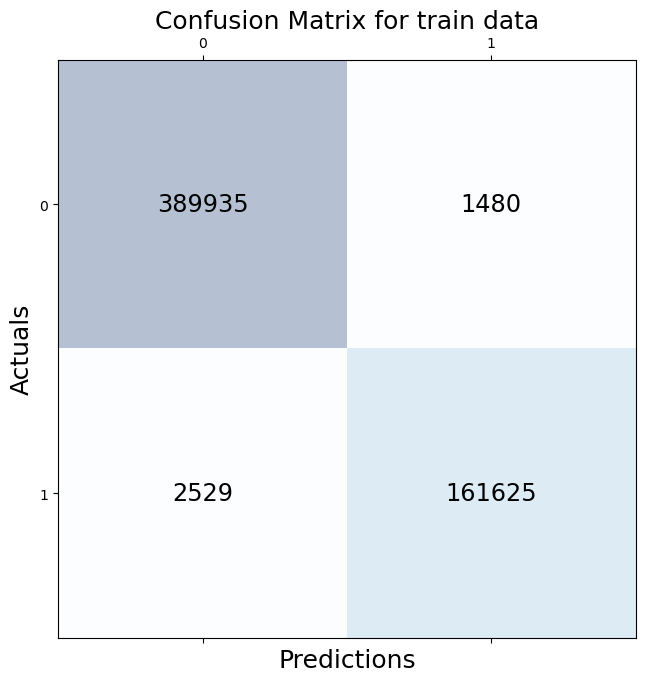

In [33]:
confusion_matrix1=confusion_matrix(y_train,pred_train)
print(confusion_matrix1)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(confusion_matrix1, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion_matrix1.shape[0]):
    for j in range(confusion_matrix1.shape[1]):
        ax.text(x=j, y=i,s=confusion_matrix1[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for train data', fontsize=18)
plt.show()

In [34]:
pred_test=rf.predict(x_test)

In [35]:
accuracy_score(y_test,pred_test)

0.9773638700294471

[[96226  1577]
 [ 1567 39523]]


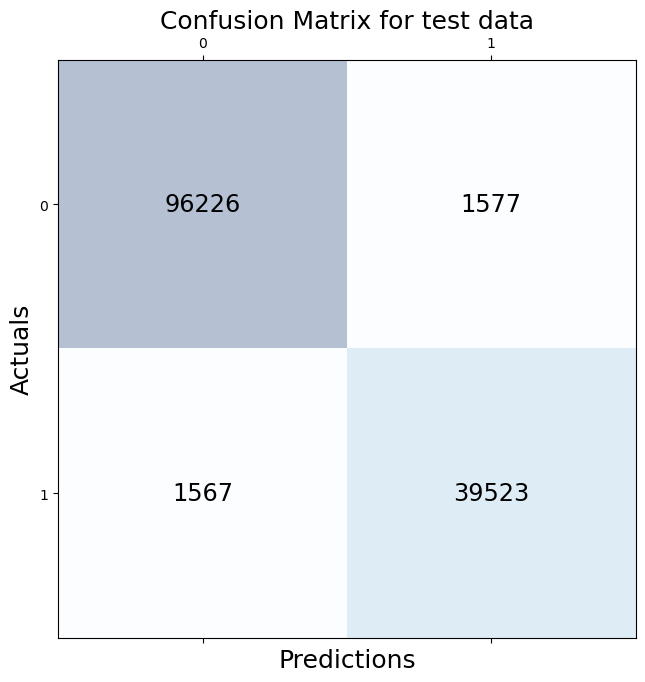

In [36]:
confusion_matrix1=confusion_matrix(y_test,pred_test)
print(confusion_matrix1)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(confusion_matrix1, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion_matrix1.shape[0]):
    for j in range(confusion_matrix1.shape[1]):
        ax.text(x=j, y=i,s=confusion_matrix1[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for test data', fontsize=18)
plt.show()

# Decision Tree

In [37]:

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [38]:
pred_train=dt.predict(x_train)

In [39]:
accuracy_score(y_train,pred_train)

0.9927911744535782

[[390257   1158]
 [  2847 161307]]


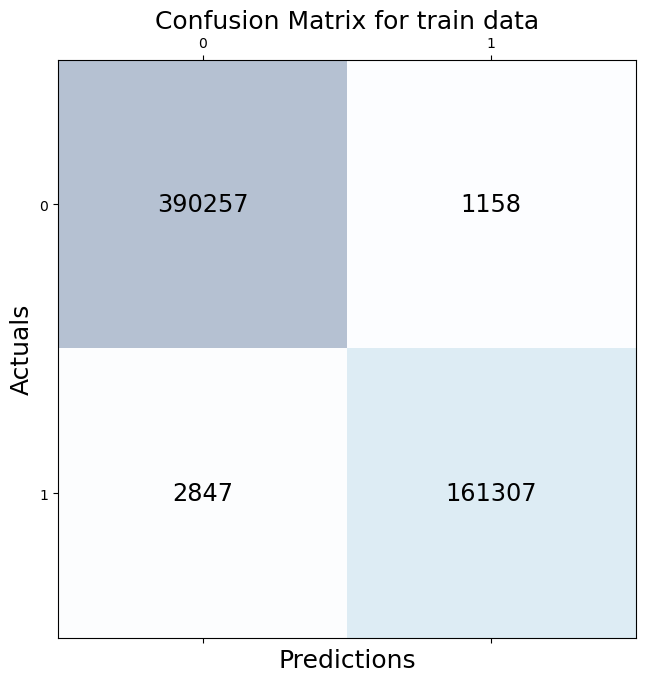

In [40]:
confusion_matrix1=confusion_matrix(y_train,pred_train)
print(confusion_matrix1)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(confusion_matrix1, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion_matrix1.shape[0]):
    for j in range(confusion_matrix1.shape[1]):
        ax.text(x=j, y=i,s=confusion_matrix1[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for train data', fontsize=18)
plt.show()

In [41]:
pred_test=dt.predict(x_test)

In [42]:
accuracy_score(y_test,pred_test)

0.9694009057331903

[[95962  1841]
 [ 2409 38681]]


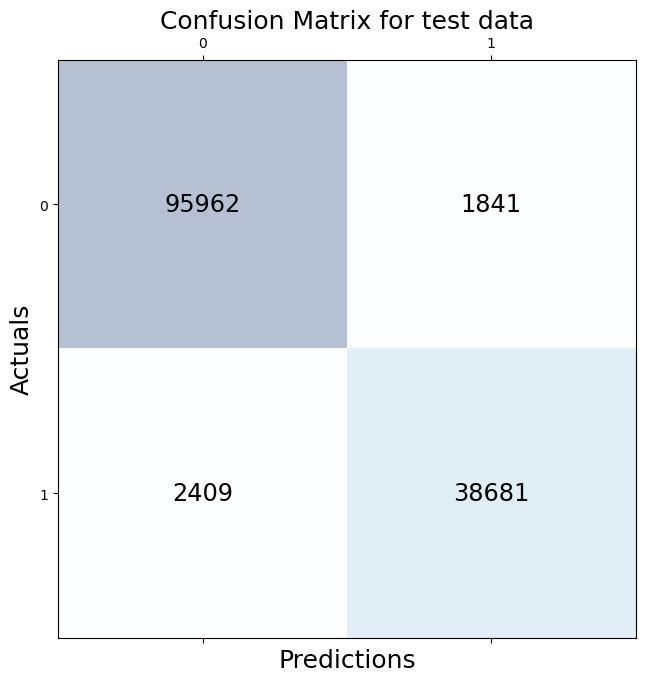

In [43]:
confusion_matrix1=confusion_matrix(y_test,pred_test)
print(confusion_matrix1)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(confusion_matrix1, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion_matrix1.shape[0]):
    for j in range(confusion_matrix1.shape[1]):
        ax.text(x=j, y=i,s=confusion_matrix1[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for test data', fontsize=18)
plt.show()

# XGBClassifier

In [44]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [45]:
pred_train=xgb.predict(x_train)

In [46]:
accuracy_score(y_train,pred_train)

0.974327221281245

[[383752   7663]
 [  6600 157554]]


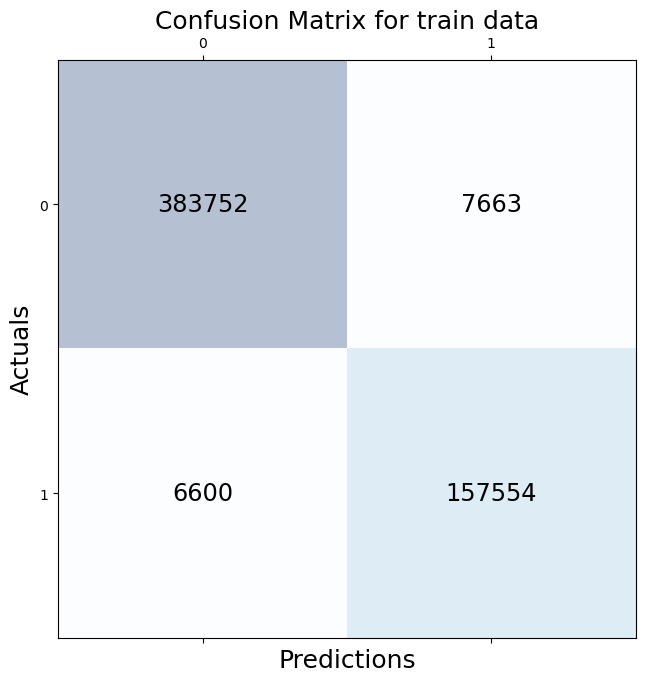

In [47]:
confusion_matrix1=confusion_matrix(y_train,pred_train)
print(confusion_matrix1)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(confusion_matrix1, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion_matrix1.shape[0]):
    for j in range(confusion_matrix1.shape[1]):
        ax.text(x=j, y=i,s=confusion_matrix1[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for train data', fontsize=18)
plt.show()

In [48]:
pred_test=xgb.predict(x_test)

In [49]:
accuracy_score(y_test,pred_test)

0.9729935993894581

[[95804  1999]
 [ 1752 39338]]


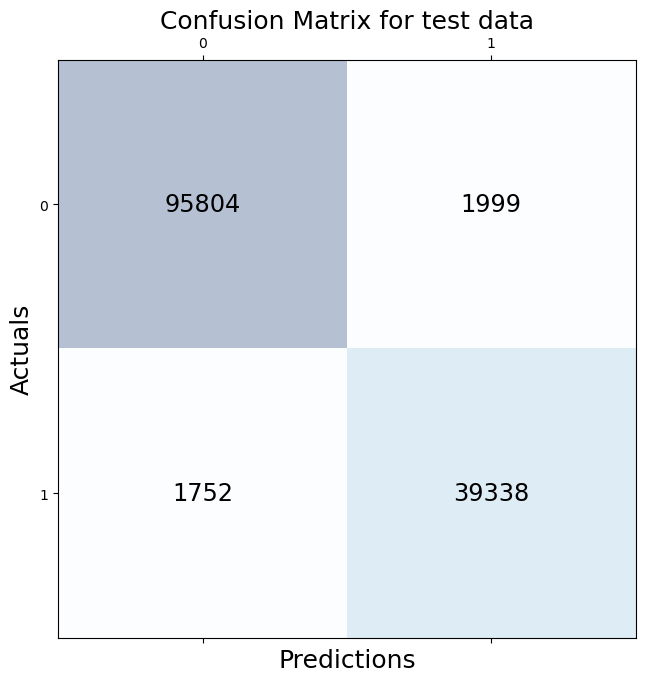

In [50]:
confusion_matrix1=confusion_matrix(y_test,pred_test)
print(confusion_matrix1)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(confusion_matrix1, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion_matrix1.shape[0]):
    for j in range(confusion_matrix1.shape[1]):
        ax.text(x=j, y=i,s=confusion_matrix1[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for test data', fontsize=18)
plt.show()

# CatBoostClassifier

In [53]:
cb = CatBoostClassifier()
cb.fit(x_train,y_train)

Learning rate set to 0.153087
0:	learn: 0.4861145	total: 332ms	remaining: 5m 31s
1:	learn: 0.3733547	total: 449ms	remaining: 3m 44s
2:	learn: 0.3110132	total: 582ms	remaining: 3m 13s
3:	learn: 0.2725819	total: 716ms	remaining: 2m 58s
4:	learn: 0.2543219	total: 994ms	remaining: 3m 17s
5:	learn: 0.2365035	total: 1.2s	remaining: 3m 18s
6:	learn: 0.2244375	total: 1.37s	remaining: 3m 14s
7:	learn: 0.2150952	total: 1.48s	remaining: 3m 3s
8:	learn: 0.2081874	total: 1.58s	remaining: 2m 54s
9:	learn: 0.1977141	total: 1.69s	remaining: 2m 47s
10:	learn: 0.1920228	total: 1.78s	remaining: 2m 40s
11:	learn: 0.1857698	total: 1.88s	remaining: 2m 34s
12:	learn: 0.1820991	total: 1.98s	remaining: 2m 29s
13:	learn: 0.1785287	total: 2.07s	remaining: 2m 25s
14:	learn: 0.1747144	total: 2.17s	remaining: 2m 22s
15:	learn: 0.1717900	total: 2.27s	remaining: 2m 19s
16:	learn: 0.1681264	total: 2.36s	remaining: 2m 16s
17:	learn: 0.1660917	total: 2.46s	remaining: 2m 14s
18:	learn: 0.1641708	total: 2.65s	remaining: 2

160:	learn: 0.0982858	total: 18.1s	remaining: 1m 34s
161:	learn: 0.0981988	total: 18.2s	remaining: 1m 34s
162:	learn: 0.0980589	total: 18.3s	remaining: 1m 34s
163:	learn: 0.0979036	total: 18.4s	remaining: 1m 33s
164:	learn: 0.0977915	total: 18.6s	remaining: 1m 33s
165:	learn: 0.0977617	total: 18.7s	remaining: 1m 33s
166:	learn: 0.0975793	total: 18.8s	remaining: 1m 33s
167:	learn: 0.0975138	total: 18.9s	remaining: 1m 33s
168:	learn: 0.0974338	total: 19s	remaining: 1m 33s
169:	learn: 0.0973742	total: 19.1s	remaining: 1m 33s
170:	learn: 0.0972504	total: 19.3s	remaining: 1m 33s
171:	learn: 0.0971731	total: 19.4s	remaining: 1m 33s
172:	learn: 0.0970687	total: 19.7s	remaining: 1m 34s
173:	learn: 0.0969622	total: 20s	remaining: 1m 34s
174:	learn: 0.0969123	total: 20.4s	remaining: 1m 36s
175:	learn: 0.0967732	total: 20.5s	remaining: 1m 36s
176:	learn: 0.0967159	total: 20.8s	remaining: 1m 36s
177:	learn: 0.0966313	total: 20.9s	remaining: 1m 36s
178:	learn: 0.0965732	total: 21.1s	remaining: 1m 3

316:	learn: 0.0868566	total: 47s	remaining: 1m 41s
317:	learn: 0.0868067	total: 47.2s	remaining: 1m 41s
318:	learn: 0.0867888	total: 47.4s	remaining: 1m 41s
319:	learn: 0.0867166	total: 47.5s	remaining: 1m 41s
320:	learn: 0.0866937	total: 47.8s	remaining: 1m 41s
321:	learn: 0.0866651	total: 47.9s	remaining: 1m 40s
322:	learn: 0.0865949	total: 48.1s	remaining: 1m 40s
323:	learn: 0.0865610	total: 48.3s	remaining: 1m 40s
324:	learn: 0.0865156	total: 48.4s	remaining: 1m 40s
325:	learn: 0.0864858	total: 48.5s	remaining: 1m 40s
326:	learn: 0.0864097	total: 48.7s	remaining: 1m 40s
327:	learn: 0.0863860	total: 48.8s	remaining: 1m 39s
328:	learn: 0.0863239	total: 48.9s	remaining: 1m 39s
329:	learn: 0.0863034	total: 49.1s	remaining: 1m 39s
330:	learn: 0.0862500	total: 49.2s	remaining: 1m 39s
331:	learn: 0.0861665	total: 49.3s	remaining: 1m 39s
332:	learn: 0.0861273	total: 49.5s	remaining: 1m 39s
333:	learn: 0.0860450	total: 49.6s	remaining: 1m 38s
334:	learn: 0.0860196	total: 49.7s	remaining: 1m

471:	learn: 0.0806840	total: 1m 16s	remaining: 1m 25s
472:	learn: 0.0806610	total: 1m 16s	remaining: 1m 24s
473:	learn: 0.0806105	total: 1m 16s	remaining: 1m 24s
474:	learn: 0.0805328	total: 1m 16s	remaining: 1m 24s
475:	learn: 0.0805165	total: 1m 16s	remaining: 1m 24s
476:	learn: 0.0804359	total: 1m 16s	remaining: 1m 24s
477:	learn: 0.0804260	total: 1m 17s	remaining: 1m 24s
478:	learn: 0.0804131	total: 1m 17s	remaining: 1m 23s
479:	learn: 0.0803826	total: 1m 17s	remaining: 1m 23s
480:	learn: 0.0803704	total: 1m 17s	remaining: 1m 23s
481:	learn: 0.0803546	total: 1m 17s	remaining: 1m 23s
482:	learn: 0.0803345	total: 1m 17s	remaining: 1m 23s
483:	learn: 0.0803141	total: 1m 17s	remaining: 1m 22s
484:	learn: 0.0802945	total: 1m 17s	remaining: 1m 22s
485:	learn: 0.0802880	total: 1m 18s	remaining: 1m 22s
486:	learn: 0.0802324	total: 1m 18s	remaining: 1m 22s
487:	learn: 0.0802047	total: 1m 18s	remaining: 1m 22s
488:	learn: 0.0801653	total: 1m 18s	remaining: 1m 21s
489:	learn: 0.0801526	total:

625:	learn: 0.0769505	total: 1m 48s	remaining: 1m 4s
626:	learn: 0.0769088	total: 1m 48s	remaining: 1m 4s
627:	learn: 0.0768909	total: 1m 49s	remaining: 1m 4s
628:	learn: 0.0768511	total: 1m 49s	remaining: 1m 4s
629:	learn: 0.0768457	total: 1m 49s	remaining: 1m 4s
630:	learn: 0.0768064	total: 1m 49s	remaining: 1m 4s
631:	learn: 0.0768023	total: 1m 49s	remaining: 1m 4s
632:	learn: 0.0767673	total: 1m 50s	remaining: 1m 3s
633:	learn: 0.0767556	total: 1m 50s	remaining: 1m 3s
634:	learn: 0.0767353	total: 1m 50s	remaining: 1m 3s
635:	learn: 0.0767082	total: 1m 50s	remaining: 1m 3s
636:	learn: 0.0767051	total: 1m 50s	remaining: 1m 3s
637:	learn: 0.0767028	total: 1m 50s	remaining: 1m 2s
638:	learn: 0.0766968	total: 1m 51s	remaining: 1m 2s
639:	learn: 0.0766417	total: 1m 51s	remaining: 1m 2s
640:	learn: 0.0766316	total: 1m 51s	remaining: 1m 2s
641:	learn: 0.0766236	total: 1m 51s	remaining: 1m 2s
642:	learn: 0.0765897	total: 1m 51s	remaining: 1m 1s
643:	learn: 0.0765661	total: 1m 51s	remaining:

782:	learn: 0.0740603	total: 2m 15s	remaining: 37.6s
783:	learn: 0.0740355	total: 2m 15s	remaining: 37.4s
784:	learn: 0.0740185	total: 2m 15s	remaining: 37.2s
785:	learn: 0.0740111	total: 2m 16s	remaining: 37.1s
786:	learn: 0.0740047	total: 2m 16s	remaining: 36.9s
787:	learn: 0.0739751	total: 2m 16s	remaining: 36.7s
788:	learn: 0.0739587	total: 2m 16s	remaining: 36.6s
789:	learn: 0.0739544	total: 2m 17s	remaining: 36.5s
790:	learn: 0.0739514	total: 2m 17s	remaining: 36.3s
791:	learn: 0.0739415	total: 2m 17s	remaining: 36.1s
792:	learn: 0.0739345	total: 2m 17s	remaining: 35.9s
793:	learn: 0.0739099	total: 2m 17s	remaining: 35.8s
794:	learn: 0.0738971	total: 2m 18s	remaining: 35.6s
795:	learn: 0.0738897	total: 2m 18s	remaining: 35.4s
796:	learn: 0.0738857	total: 2m 18s	remaining: 35.3s
797:	learn: 0.0738651	total: 2m 18s	remaining: 35.1s
798:	learn: 0.0738486	total: 2m 18s	remaining: 34.9s
799:	learn: 0.0738172	total: 2m 18s	remaining: 34.7s
800:	learn: 0.0738041	total: 2m 19s	remaining:

938:	learn: 0.0719963	total: 2m 43s	remaining: 10.6s
939:	learn: 0.0719826	total: 2m 43s	remaining: 10.4s
940:	learn: 0.0719717	total: 2m 43s	remaining: 10.3s
941:	learn: 0.0719463	total: 2m 43s	remaining: 10.1s
942:	learn: 0.0719420	total: 2m 44s	remaining: 9.92s
943:	learn: 0.0719363	total: 2m 44s	remaining: 9.74s
944:	learn: 0.0719341	total: 2m 44s	remaining: 9.57s
945:	learn: 0.0719305	total: 2m 44s	remaining: 9.4s
946:	learn: 0.0719236	total: 2m 44s	remaining: 9.22s
947:	learn: 0.0719093	total: 2m 44s	remaining: 9.05s
948:	learn: 0.0719045	total: 2m 45s	remaining: 8.88s
949:	learn: 0.0718894	total: 2m 45s	remaining: 8.7s
950:	learn: 0.0718885	total: 2m 45s	remaining: 8.53s
951:	learn: 0.0718820	total: 2m 45s	remaining: 8.36s
952:	learn: 0.0718707	total: 2m 45s	remaining: 8.18s
953:	learn: 0.0718629	total: 2m 46s	remaining: 8.01s
954:	learn: 0.0718199	total: 2m 46s	remaining: 7.84s
955:	learn: 0.0718136	total: 2m 46s	remaining: 7.66s
956:	learn: 0.0717910	total: 2m 46s	remaining: 7

In [54]:
pred_train=cb.predict(x_train)

In [55]:
accuracy_score(y_train,pred_train)

0.9770217560735031

In [56]:
pred_test=cb.predict(x_test)

In [57]:
accuracy_score(y_test,pred_test)

0.974743147602831

[[96001  1802]
 [ 1706 39384]]


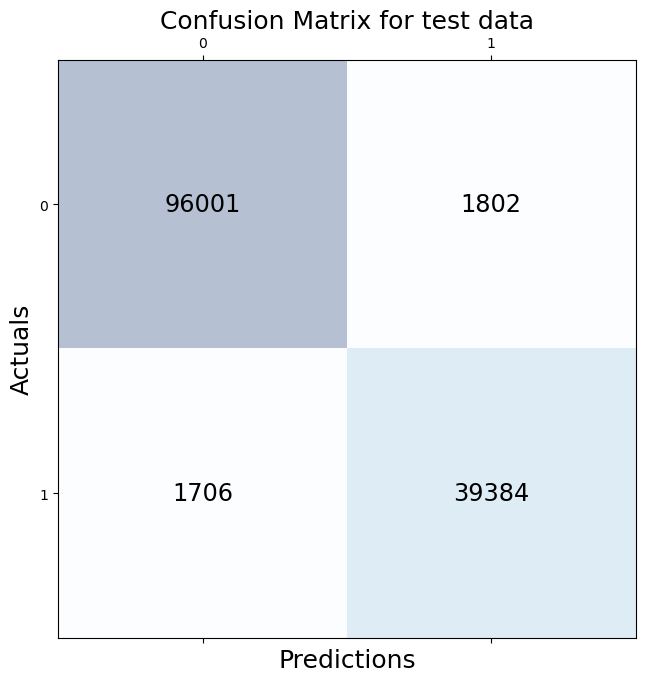

In [58]:
confusion_matrix1=confusion_matrix(y_test,pred_test)
print(confusion_matrix1)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(confusion_matrix1, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion_matrix1.shape[0]):
    for j in range(confusion_matrix1.shape[1]):
        ax.text(x=j, y=i,s=confusion_matrix1[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for test data', fontsize=18)
plt.show()

# VotingClassifier

In [59]:
classifiers = [
                
                ('RF :',rf),
                ('DT :',dt),
                ("XGB:" , xgb),
                ]

In [60]:
model = VotingClassifier(estimators=classifiers,voting='hard')
model.fit(x_train, y_train)

VotingClassifier(estimators=[('RF :', RandomForestClassifier()),
                             ('DT :', DecisionTreeClassifier()),
                             ('XGB:',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,


In [61]:
pred_train=model.predict(x_train)

In [62]:
accuracy_score(y_train,pred_train)

0.9927857745842551

[[389997   1418]
 [  2590 161564]]


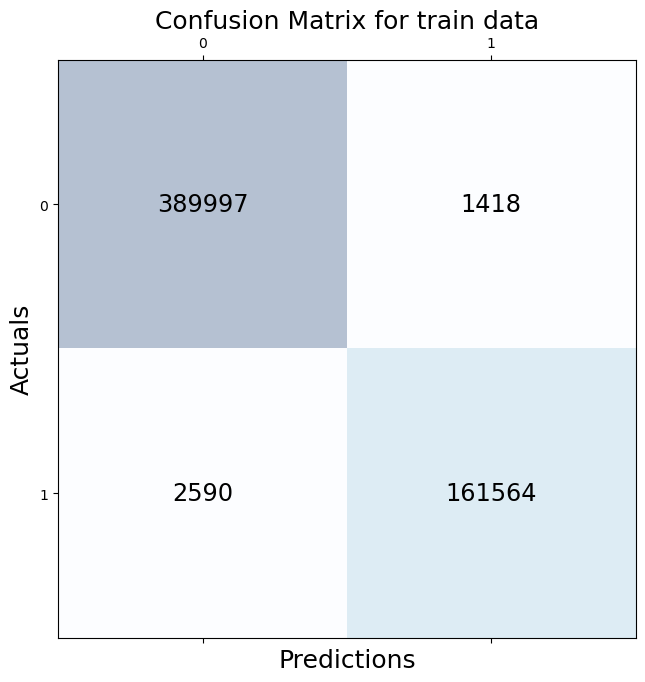

In [63]:
confusion_matrix1=confusion_matrix(y_train,pred_train)
print(confusion_matrix1)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(confusion_matrix1, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion_matrix1.shape[0]):
    for j in range(confusion_matrix1.shape[1]):
        ax.text(x=j, y=i,s=confusion_matrix1[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for train data', fontsize=18)
plt.show()

In [64]:
pred_test=model.predict(x_test)

In [65]:
accuracy_score(y_test,pred_test)

0.9773062717343567

[[96259  1544]
 [ 1608 39482]]


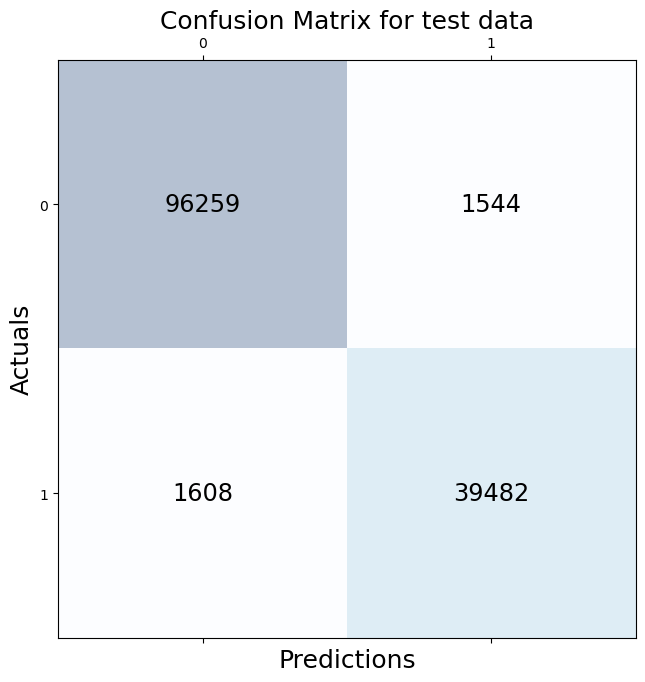

In [66]:
confusion_matrix1=confusion_matrix(y_test,pred_test)
print(confusion_matrix1)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(confusion_matrix1, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion_matrix1.shape[0]):
    for j in range(confusion_matrix1.shape[1]):
        ax.text(x=j, y=i,s=confusion_matrix1[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for test data', fontsize=18)
plt.show()

 # Saving the best model

In [67]:
import pickle

In [68]:
with open('best_model_pkl','wb') as file:
    pickle.dump(model,file)